In [1]:
import random
random.seed(24071992)
import numpy as np
np.random.seed(24071992)
import matplotlib
import matplotlib.pyplot as plt
import scipy.spatial
import pickle
import pandas as pd
import scipy
# http://stackoverflow.com/questions/10143905/python-two-curve-gaussian-fitting-with-non-linear-least-squares
from sklearn import mixture
import matplotlib.pyplot
import matplotlib.mlab
import numpy as np
import itertools
#import seaborn as sns
import math
from sklearn.neighbors import KernelDensity
plt.rcParams.update({'figure.max_open_warning': 150})
import scipy
scipy.spatial.KDTree.sparse_distance_matrix
import statistics as stat

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib notebook
#%matplotlib inline

# Random cells

In [3]:
centroid = np.random.rand(50,2)

<IPython.core.display.Javascript object>


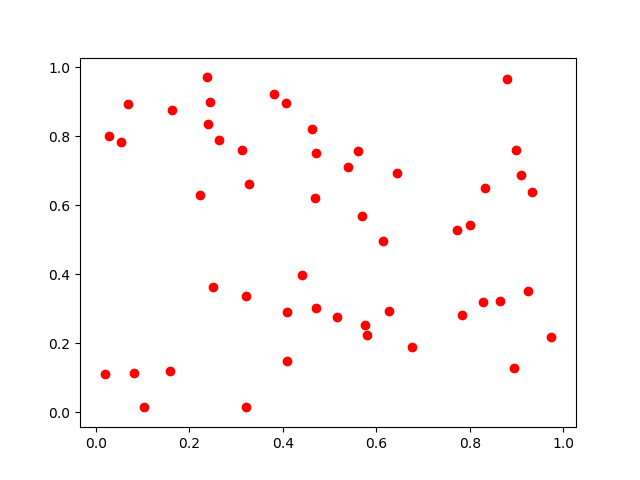

In [12]:
def cell_scatter(arr2D, color='blue'):
    
    for i in range(len(arr2D)):
        plt.scatter(arr2D[i][0], arr2D[i][1], c=color)
        
cell_scatter(centroid, 'red')

<IPython.core.display.Javascript object>


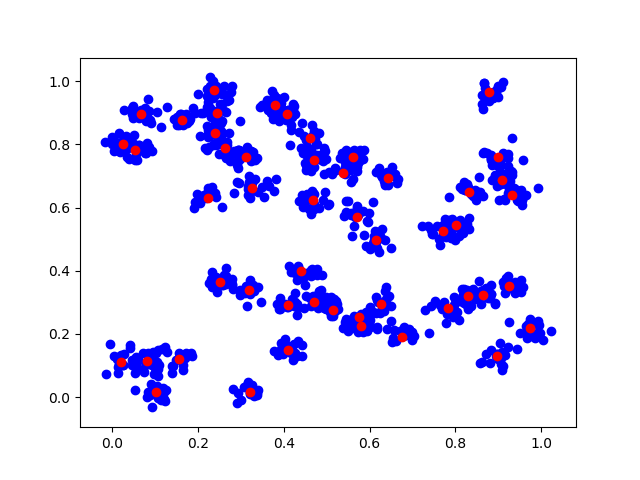

In [13]:
cloud = 20
dots = np.zeros([len(centroid)*cloud, 2])
plt.figure()
for i, p in enumerate(centroid):
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.02)
        y_shift = np.random.normal(0, scale=0.02)
        dots[pos] = p[0]+x_shift, p[1]+y_shift

cell_scatter(dots)
cell_scatter(centroid, color='red')

<IPython.core.display.Javascript object>


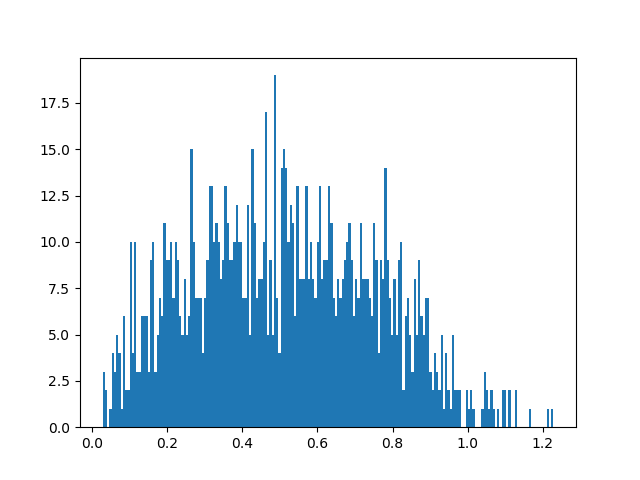

In [15]:
plt.figure()
dist = scipy.spatial.distance.pdist(centroid)
plt.hist(dist,bins=200);

# Cells in a grid

[ 0.  0.]
[ 0.  1.]
[ 0.  2.]
[ 0.  3.]
[ 1.  0.]
[ 1.  1.]
[ 1.  2.]
[ 1.  3.]
[ 2.  0.]
[ 2.  1.]
[ 2.  2.]
[ 2.  3.]
[ 3.  0.]
[ 3.  1.]
[ 3.  2.]
[ 3.  3.]


<IPython.core.display.Javascript object>


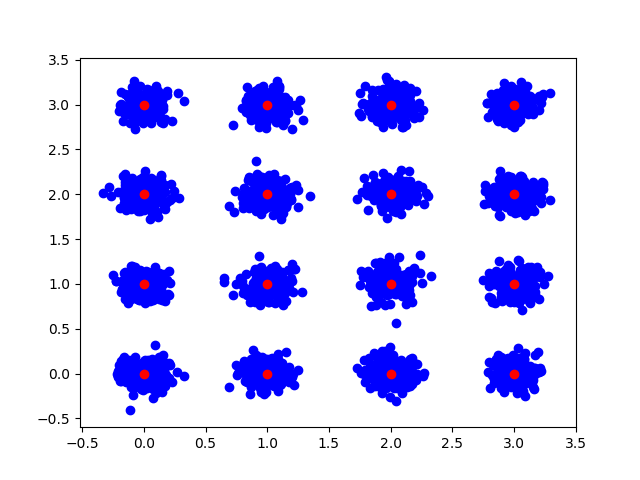

In [16]:
cloud = 200
grid_c = np.zeros([16, 2])

for i, p in enumerate(grid_c):
    x = int(i/4)
    y = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
    y = y[i]
    grid_c[i] = x,y

    
grid_p = np.zeros([len(grid_c)*cloud, 2])
for i, p in enumerate(grid_c):
    print(p)
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.1)
        y_shift = np.random.normal(0, scale=0.1)
        grid_p[pos] = p[0]+x_shift, p[1]+y_shift
plt.figure()    
cell_scatter(grid_p)
cell_scatter(grid_c, color='red')

<IPython.core.display.Javascript object>


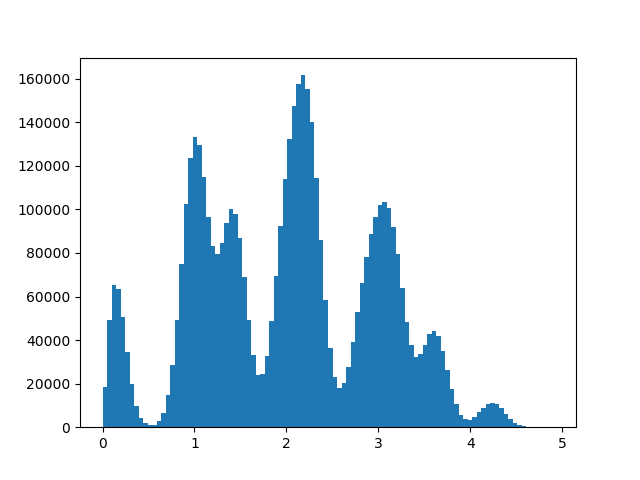

In [18]:
dist = scipy.spatial.distance.pdist(grid_p, )
plt.figure()
plt.hist(dist,bins=100);

In [19]:
#scipy.spatial.KDTree.sparse_distance_matrix()
grid_p_tree = scipy.spatial.KDTree(grid_p)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]


<IPython.core.display.Javascript object>


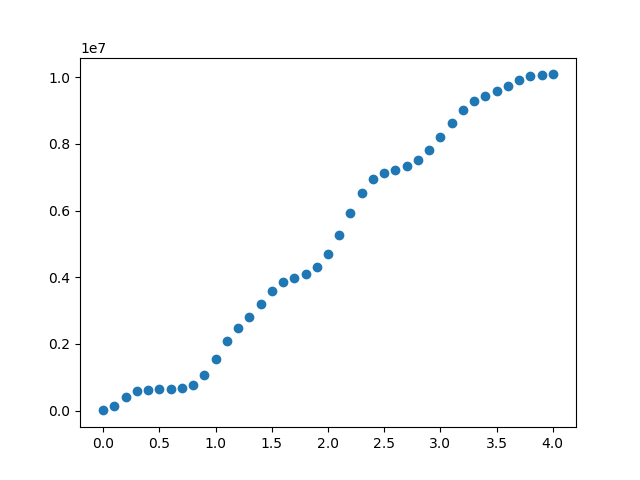

In [20]:
interval = np.linspace(0,4,41)
print(interval)
plt.figure()
plt.scatter(interval, grid_p_tree.count_neighbors(grid_p_tree, interval));
#Logically, the KDTree has more neighbours if you increase the range.
#You see the same jumps as with the above histogram

# Sparse distance matrix

In [21]:
grid_p_sparse = grid_p_tree.sparse_distance_matrix(grid_p_tree, max_distance=2)
grid_p_sparse

<3200x3200 sparse matrix of type '<class 'numpy.float64'>'
	with 4705890 stored elements in Dictionary Of Keys format>

<IPython.core.display.Javascript object>


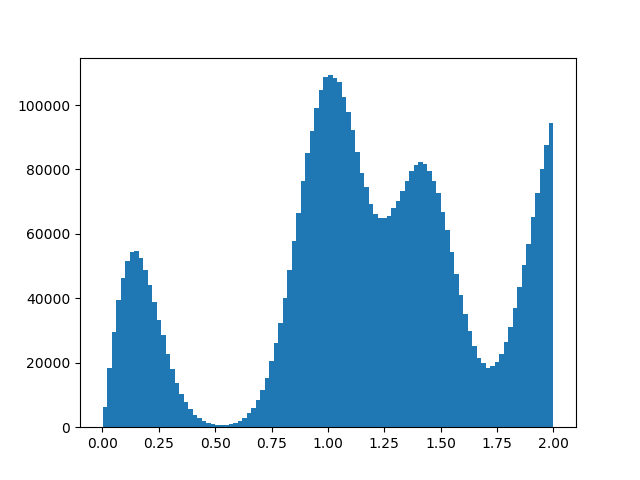

In [23]:
sparse_values = np.array(list(grid_p_sparse.values()))
plt.figure()
plt.hist(sparse_values, bins=100);

<IPython.core.display.Javascript object>


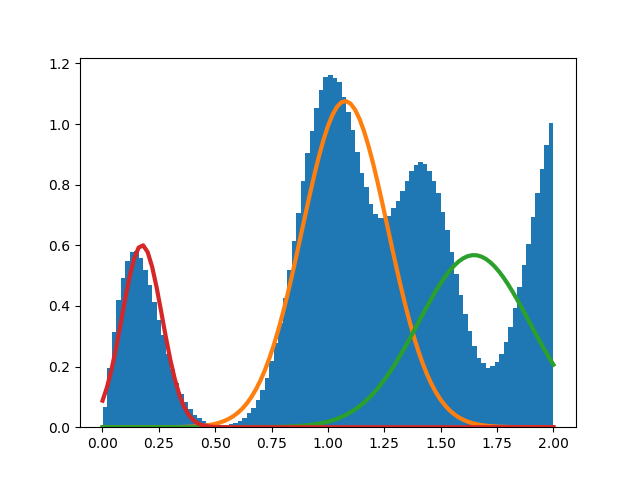

In [24]:
plt.figure()
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
data = np.reshape(sparse_values, (len(sparse_values),1))
clf.fit(data)
m1, m2, m3 = clf.means_
w1, w2, w3= clf.weights_
c1, c2, c3 = clf.covariances_
histdist = matplotlib.pyplot.hist(data, 100, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*matplotlib.mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*matplotlib.mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss3 = lambda x: plt.plot(x,w3*matplotlib.mlab.normpdf(x,m3,np.sqrt(c3))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plotgauss3(histdist[1])

<IPython.core.display.Javascript object>


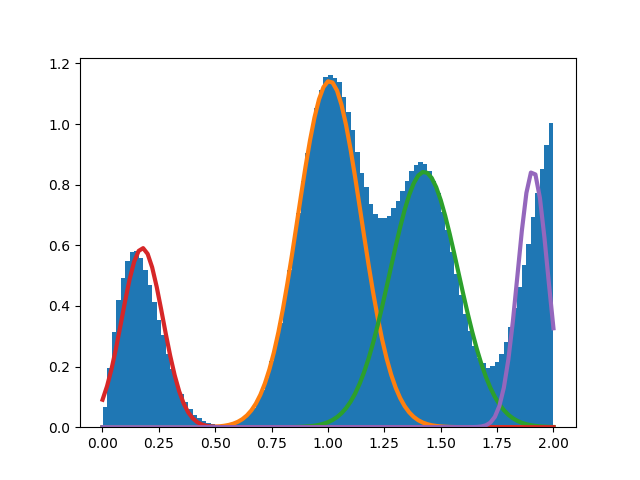

In [25]:
plt.figure()
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
data = np.reshape(sparse_values, (len(sparse_values),1))
clf.fit(data)
m1, m2, m3, m4 = clf.means_
w1, w2, w3, w4= clf.weights_
c1, c2, c3, c4 = clf.covariances_
histdist = matplotlib.pyplot.hist(data, 100, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*matplotlib.mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*matplotlib.mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss3 = lambda x: plt.plot(x,w3*matplotlib.mlab.normpdf(x,m3,np.sqrt(c3))[0], linewidth=3)
plotgauss4 = lambda x: plt.plot(x,w4*matplotlib.mlab.normpdf(x,m4,np.sqrt(c4))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plotgauss3(histdist[1])
plotgauss4(histdist[1])

# Vorronoi
    move this later to another notebook

In [ ]:
five = np.random.rand(5, 2)
ten = np.random.rand(10,2)

In [ ]:
vor = scipy.spatial.Voronoi(ten)
scipy.spatial.voronoi_plot_2d(vor, show_vertices=False);

In [ ]:
plt.scatter(vor.ridge_vertices)

In [ ]:
e = vor.ridge_vertices

e[0:1,:]

In [ ]:
dela = scipy.spatial.Delaunay(five)
scipy.spatial.delaunay_plot_2d(dela);

# Cortex data

In [2]:
df_fish_totmol_clean = pickle.load(open("df_fish_totmol_clean_180220.p", 'rb'))
df_coord = pickle.load(open("Cell_coordinates.p", 'rb'))
df_coord = df_coord.loc[:,df_fish_totmol_clean.columns]
df_coord = df_coord.T
labels_a = pickle.load(open("labels_a_df_fish_totmol_clean_180220.p", 'rb'))

cell_labels = dict(zip(df_fish_totmol_clean.columns, labels_a))

In [3]:
label_cells = {}
for i in np.unique(labels_a):
    label_cells[i] = []

for n,c in enumerate(df_fish_totmol_clean.columns):
    label_cells[labels_a[n]].append(c)
    

In [7]:
cluster_names = {13: 'Pyramidal L4 2',
17: 'Oligodendrocyte COP',
21: 'Pyramidal interface L3-4',
27: 'Ependymal',
37: 'Pericytes',
41: 'Oligodendrocytes MF',
43: 'OPC',
45: 'Pyramidal Cpne5',
47: 'Interneuron Kcnip Pthlh',
54: 'Pyramidal L2-3',
55: 'Pyramidal L2-3 L5',
61: 'Oligodendrocyte NF',
62: 'Astrocyte Mfge8',
63: 'Astrocyte Gfap',
66: 'Interneuron Kcnip2',
68: 'Interneuron Kcnip2, Syt6',
69: 'Interneuron Gad2 Slc32a1-',
73: 'Interneuron Cnr1 Vip Crh',
75: 'Microglia',
78: 'Interneuron Cnr1',
79: 'Hippocampal neuron',
81: 'Choroid plexus',
83: 'PVM VSM',
85: 'Interneuron Vip',
86: 'Interneuron Lamp5',
87: 'Pyramidal L5',
88: 'BQ',
89: 'Endothelial 1',
90: 'Pyramidal L4',
91: 'Pyramidal L6',
92: 'Endothelial',
93: 'Interneuron Crhbp',
94: 'Oligodendrocyte mature'}

cluster_names_short = {13: 'Pyr L4 2',
17: 'Olig COP',
21: 'Py L3-4',
27: 'Ependymal',
37: 'Pericytes',
41: 'Olig MF',
43: 'OPC',
45: 'Py Cpne5',
47: 'Inhib Pthlh',
54: 'Py L2-3',
55: 'Py L2-3 L5',
61: 'Olig NF',
62: 'Astro Mfge8',
63: 'Astro Gfap',
66: 'Inhib Kcnip2',
68: 'Inhib Syt6', #CP
69: 'Inhib Slc32a1-', #IC
73: 'Inhib Crh',
75: 'Microglia',
78: 'Int Cnr1',
79: 'Hippocampal',
81: 'C. plexus',
83: 'PVM VSM',
85: 'Inhib Vip',
86: 'Inhib Lamp5',
87: 'Pyl L5',
88: 'BQ',
89: 'Endothelial 1',
90: 'Py L4',
91: 'Py L6',
92: 'Endothelial',
93: 'Inhib Crhbp',
94: 'Olig mature'}



In [4]:
cluster_names = {
    18 : 'Inhibitory CP',
    17 : 'Inhibitory Crhbp',
    14 : 'Inhibitory Cnr1',
    19 : 'Inhibitory IC',
    15 : 'Inhibitory Kcnip2',
    16 : 'Inhibitory Pthlh',
    20 : 'Inhibitory Vip',
     9 : 'Pyramidal Cpne5',
     8 : 'Pyramidal L2-3',
    10 : 'Pyramidal L2-3 L5',
     6 : 'Pyramidal Kcnip2',
     5 : 'Pyramidal L3-4',
     4 : 'pyramidal L4',
    12 : 'Pyramidal L5',
     1 : 'Pyramidal L6',
    13 : 'Hippocampus',
     3 : 'Astrocyte Gfap',
     2 : 'Astrocyte Mfge8',
    32 : 'Oligodendrocyte Precursor cells',
    33 : 'Oligodendrocyte COP',
    30 : 'Oligodendrocyte NF',
    22 : 'Oligodendrocyte MF',
    21 : 'Oligodendrocyte Mature',
    28 : 'Perivascular Macrophages',
    29 : 'Microglia',
    24 : 'C. Plexus',
    27 : 'Ependymal',
    31 : 'Pericytes',
     7 : 'Endothelial',
    26 : 'Endothelial 1',
    25 : 'Vascular Smooth Muscle'}

cluster_names_short = {
    18 : 'Inh CP',
    17 : 'Inhib Crhbp',
    14 : 'Inhib Cnr1',
    19 : 'Inhib IC',
    15 : 'Inhib Kcnip2',
    16 : 'Inhib Pthlh',
    20 : 'Inhib Vip',
     9 : 'Py Cpne5',
     8 : 'Py L2-3',
    10 : 'Py L2-3 L5',
     6 : 'Py Kcnip2',
     5 : 'Pyl L3-4',
     4 : 'Py L4',
    12 : 'Py L5',
     1 : 'Py L6',
    13 : 'Hippocampus',
     3 : 'Astro Gfap',
     2 : 'Astro Mfge8',
    32 : 'OPC',
    33 : 'Oligo COP',
    30 : 'Oligo NF',
    22 : 'Oligo MF',
    21 : 'Oligo Mature',
    28 : 'PVM',
    29 : 'Microglia',
    24 : 'C. Plexus',
    27 : 'Ependymal',
    31 : 'Pericytes',
     7 : 'Endothelial',
    26 : 'Endothelial 1',
    25 : 'VSM'}

<IPython.core.display.Javascript object>


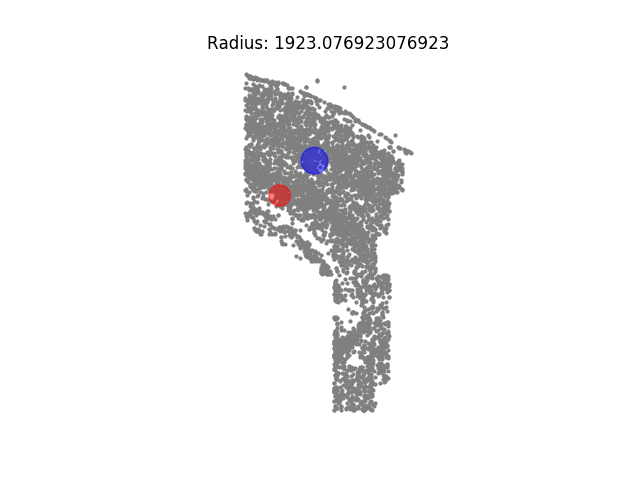

In [5]:
#plt.ion()
plt.figure()
ax = plt.gca()
plt.scatter(df_coord.loc[:,'X'], df_coord.loc[:,'Y'], c='gray', s=4)
radius = 125/0.065 
circle = plt.Circle((15000, 15000), radius, color='blue', alpha=0.5)
ax.add_artist(circle)
circle2 = plt.Circle((20000, 20000), (100/0.065), color='red', alpha=0.5)
ax.add_artist(circle2)
ax.set_aspect('equal')
ax.set_axis_off()
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title('Radius: {}'.format(radius))

In [6]:
tree = scipy.spatial.KDTree(df_coord)
sparse_dm = tree.sparse_distance_matrix(tree, max_distance=1000)

In [7]:
dense_dm = sparse_dm.todense()
df_dense_dm = pd.DataFrame(data=dense_dm, index=df_coord.index, columns=df_coord.index)

<IPython.core.display.Javascript object>


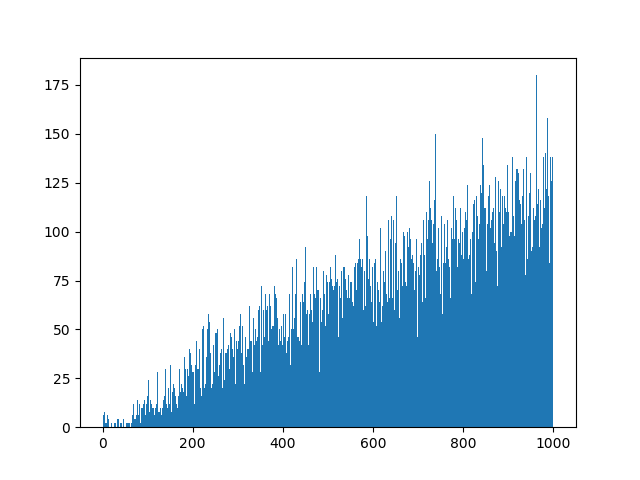

In [8]:
plt.figure()
sparse_values = np.array(list(sparse_dm.values()))
plt.hist(sparse_values, bins=2000, );

## neighbours within radius

In [12]:
count = 0
for i in itertools.combinations(np.unique(labels_a), 2):
    count += 1
    #print(i)
print(count)

465


In [11]:
#Make Combinations and Permutations

n_clust = len(np.unique(labels_a))    
n_combi = math.factorial(n_clust) / ((math.factorial(2)) * math.factorial(n_clust - 2))

combinations = [i for i in itertools.combinations(np.unique(labels_a), 2)]
permutations = [i for i in itertools.permutations(np.unique(labels_a), 2)]

<IPython.core.display.Javascript object>


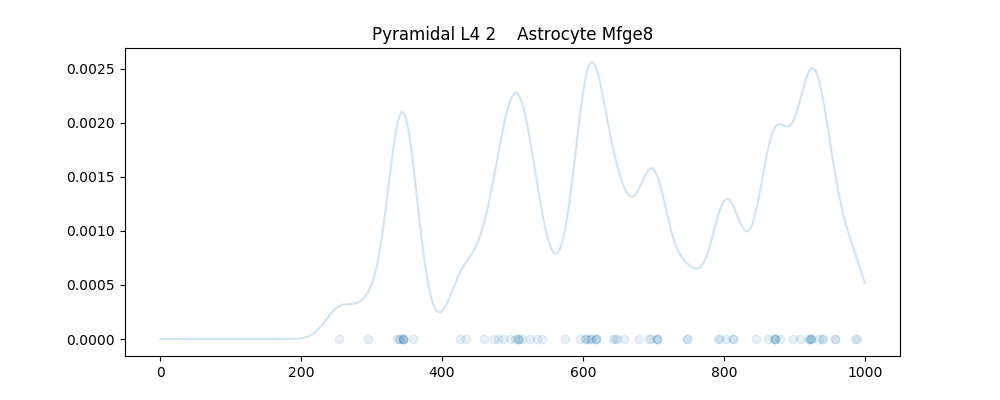

<IPython.core.display.Javascript object>


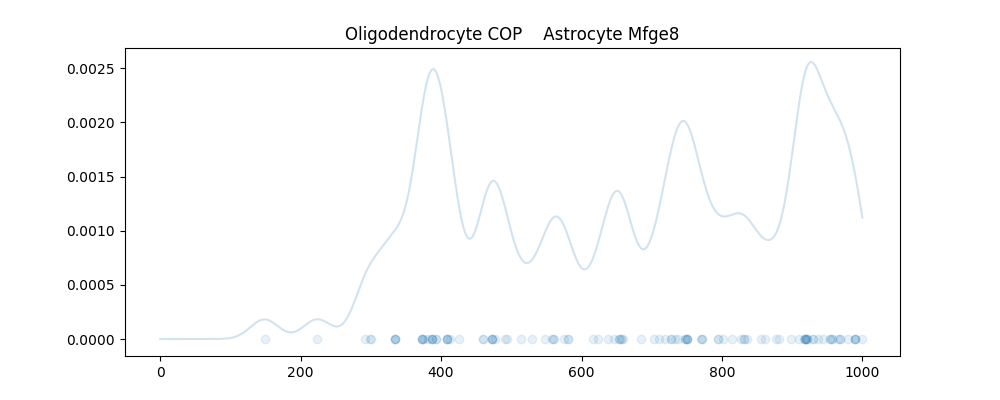

<IPython.core.display.Javascript object>


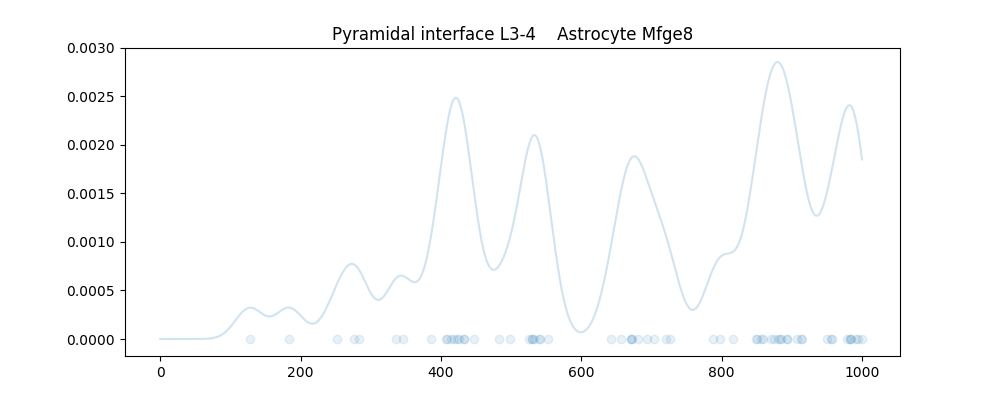

<IPython.core.display.Javascript object>


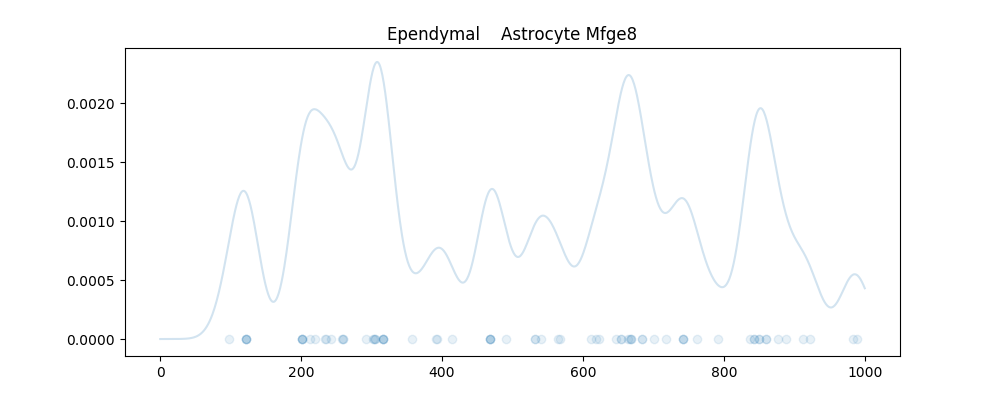

<IPython.core.display.Javascript object>


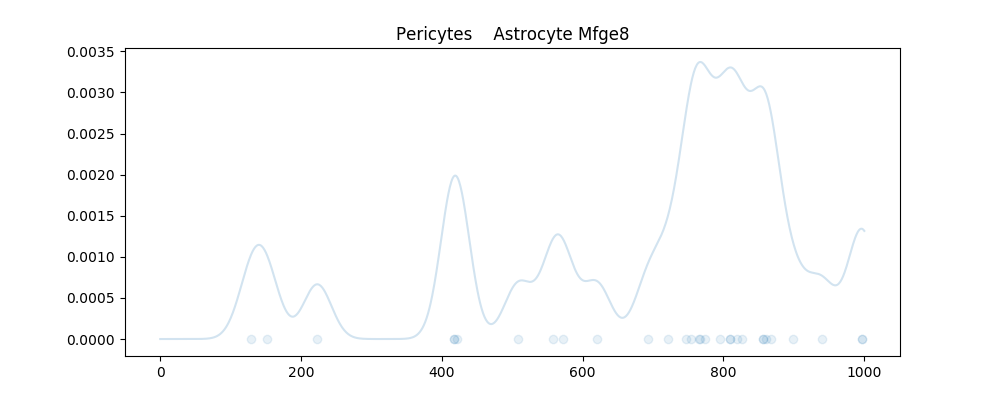

<IPython.core.display.Javascript object>


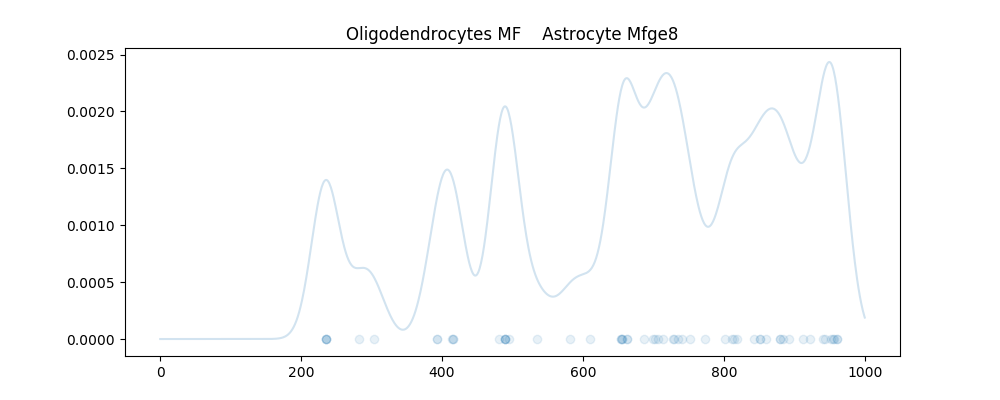

<IPython.core.display.Javascript object>


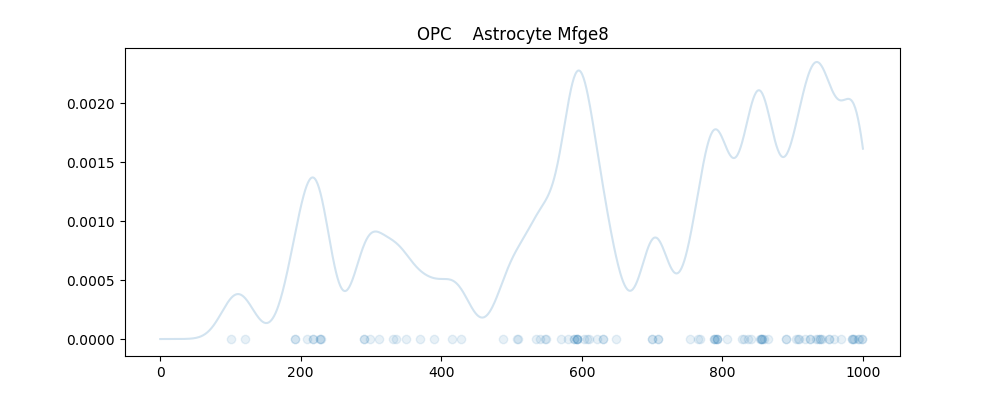

<IPython.core.display.Javascript object>


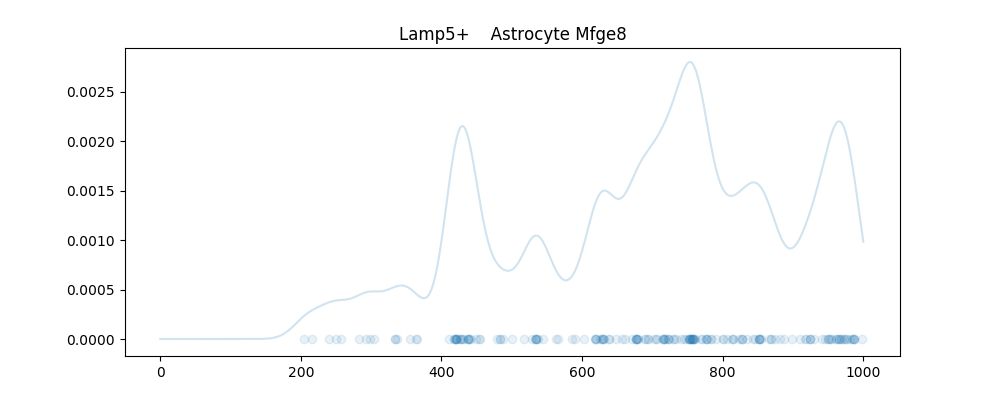

<IPython.core.display.Javascript object>


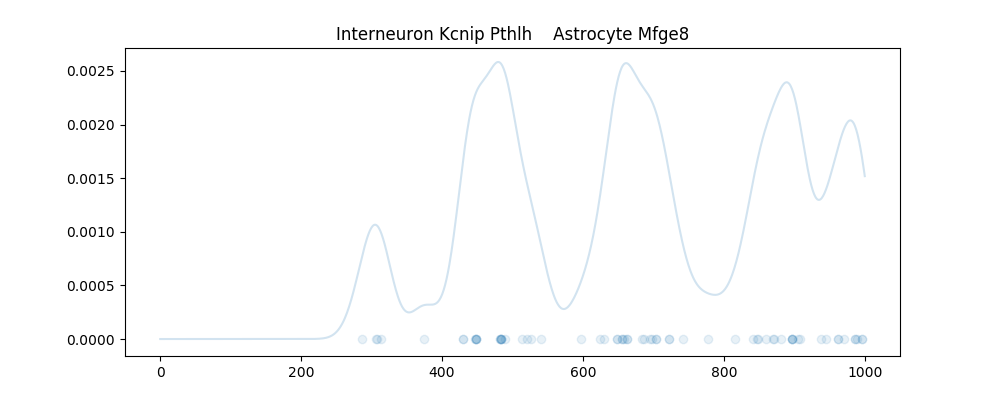

<IPython.core.display.Javascript object>


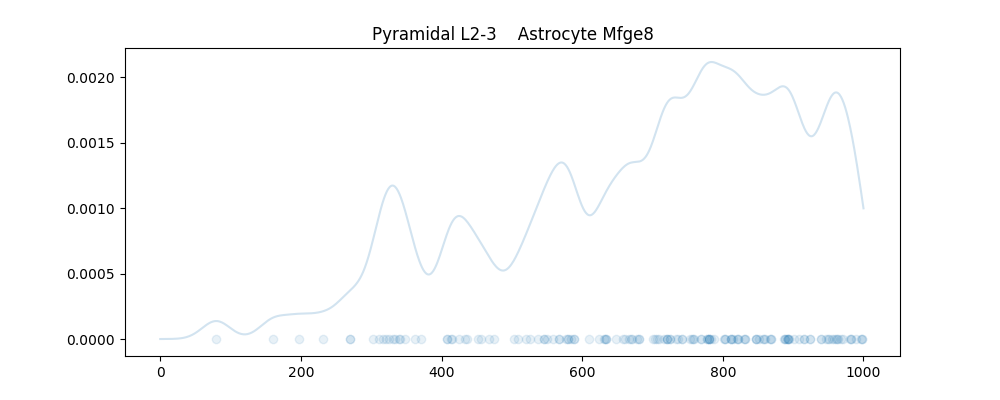

<IPython.core.display.Javascript object>


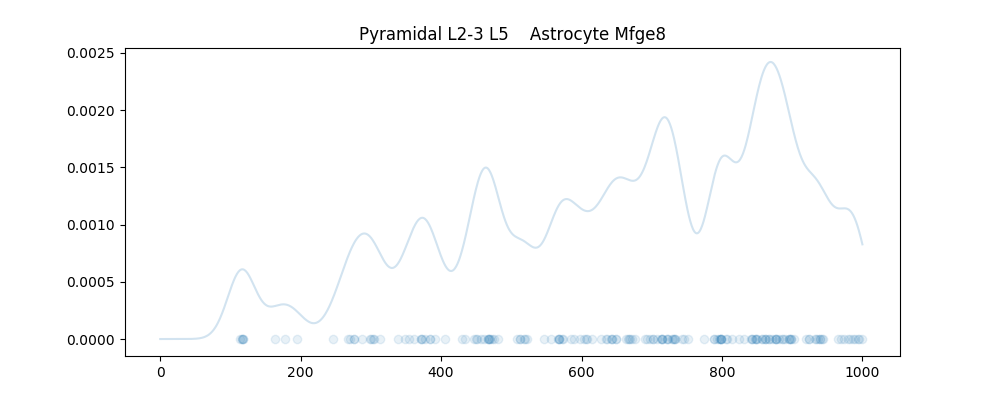

<IPython.core.display.Javascript object>


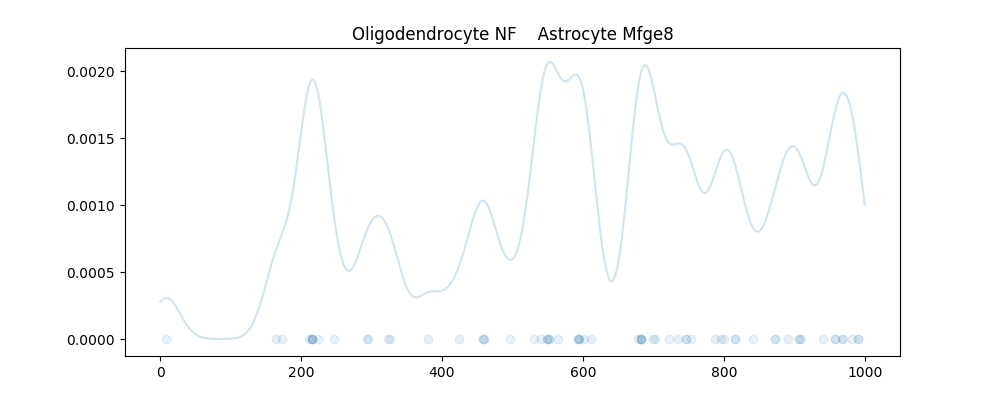

<IPython.core.display.Javascript object>


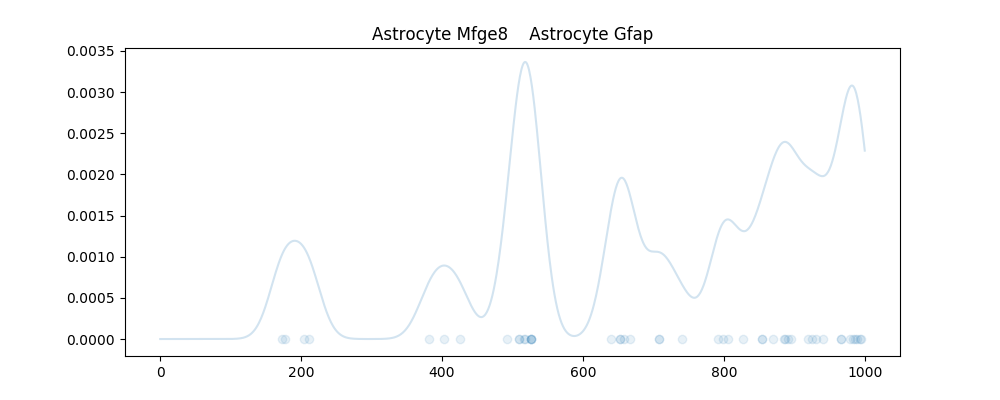

<IPython.core.display.Javascript object>


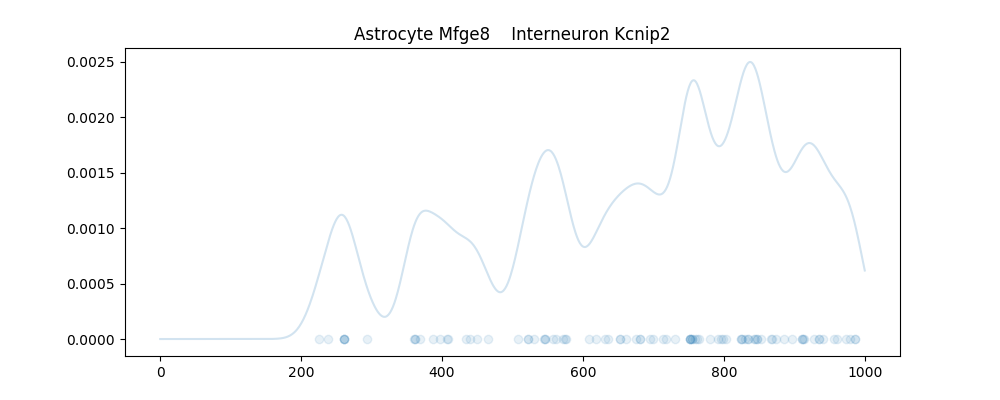

<IPython.core.display.Javascript object>


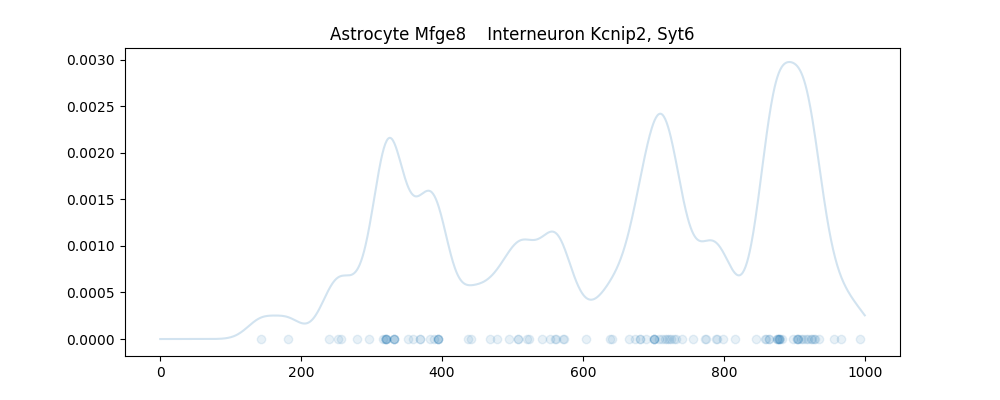

<IPython.core.display.Javascript object>


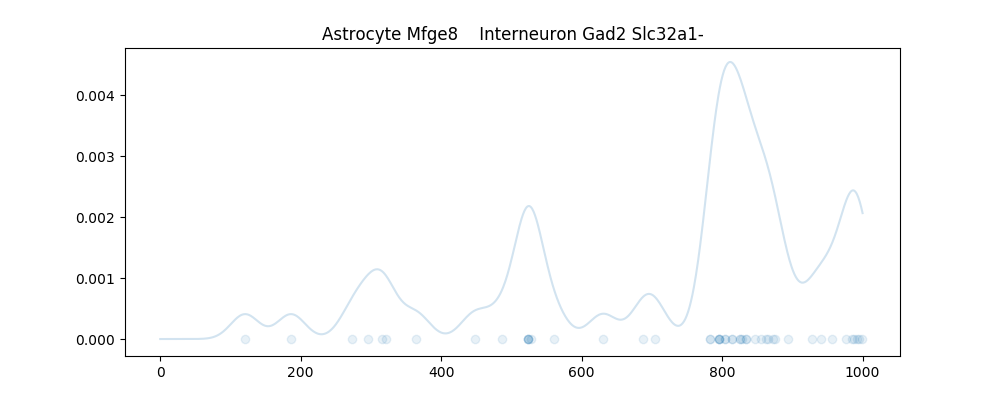

<IPython.core.display.Javascript object>


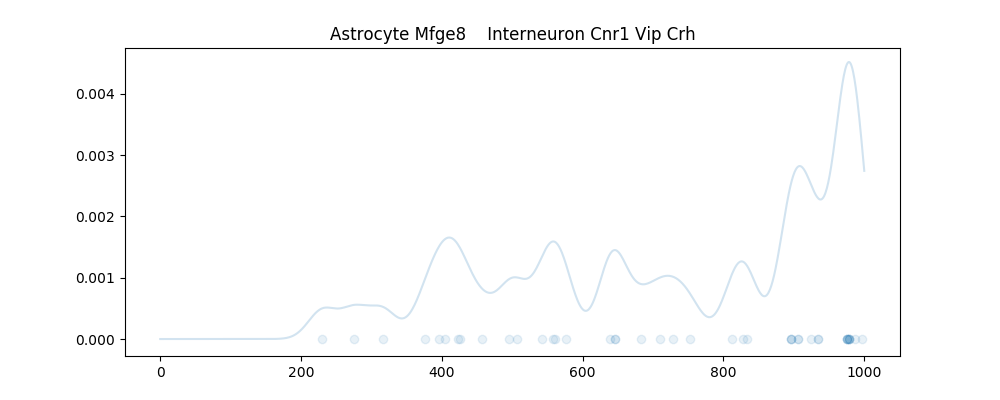

<IPython.core.display.Javascript object>


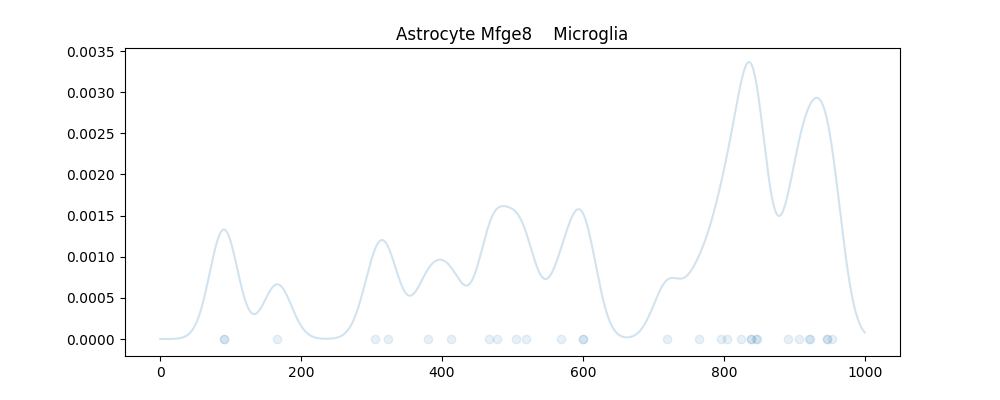

<IPython.core.display.Javascript object>


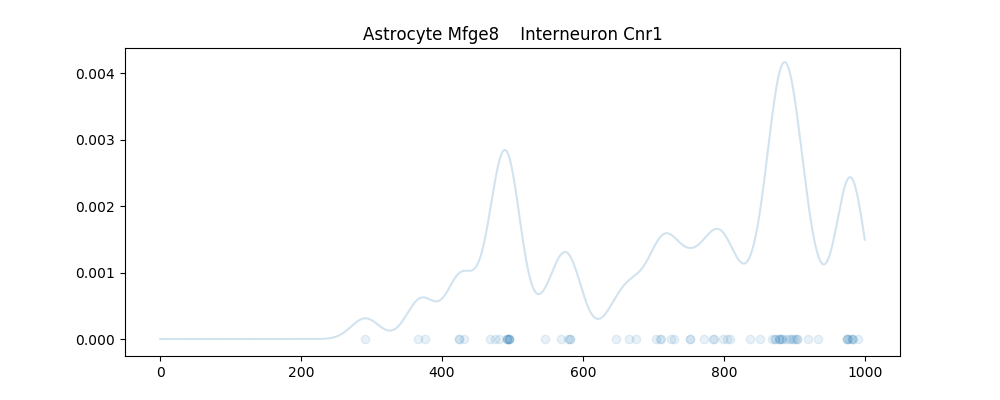

<IPython.core.display.Javascript object>


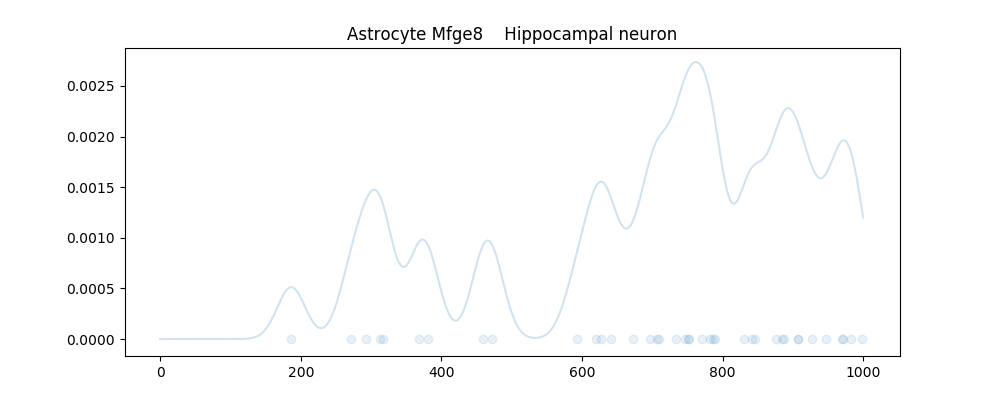

<IPython.core.display.Javascript object>


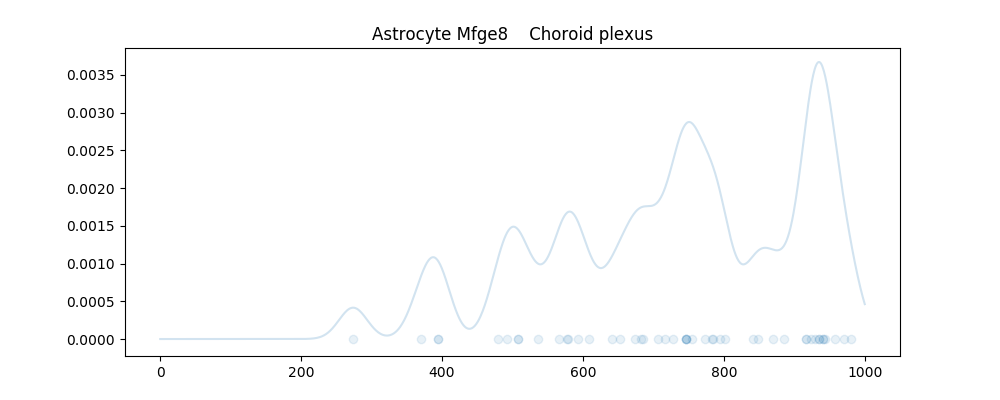

<IPython.core.display.Javascript object>


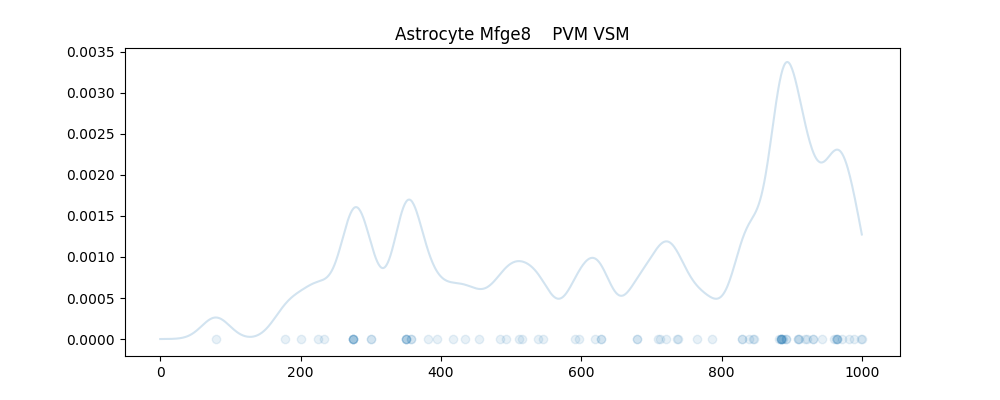

<IPython.core.display.Javascript object>


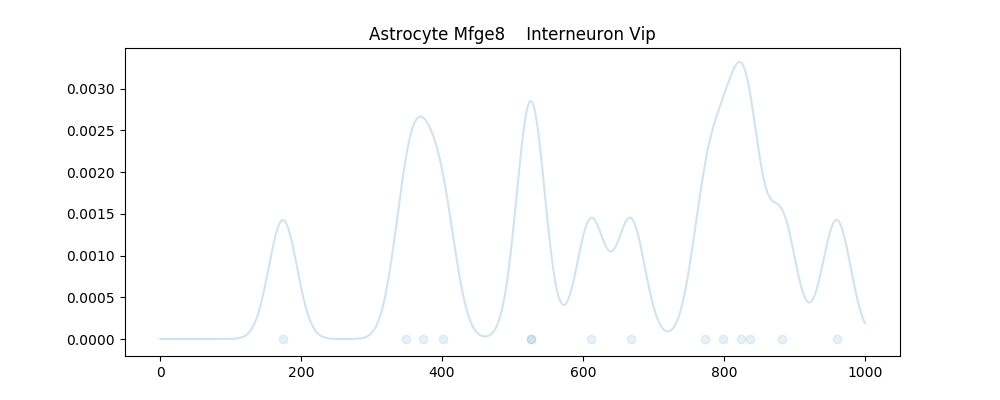

<IPython.core.display.Javascript object>


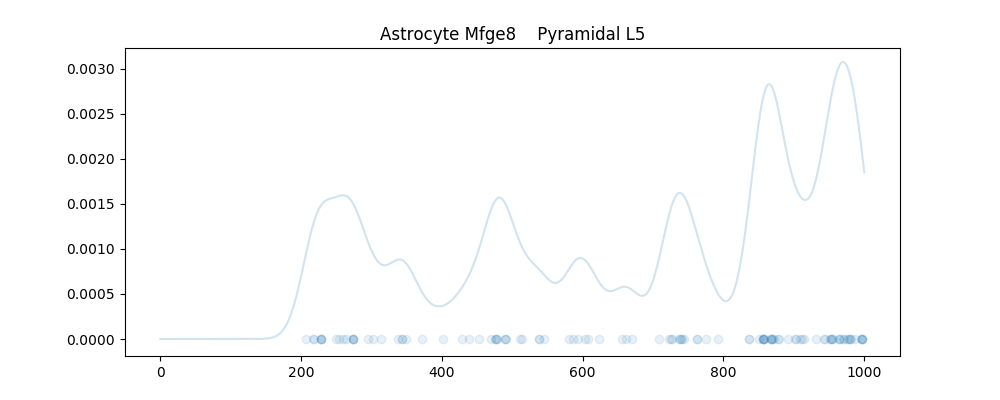

<IPython.core.display.Javascript object>


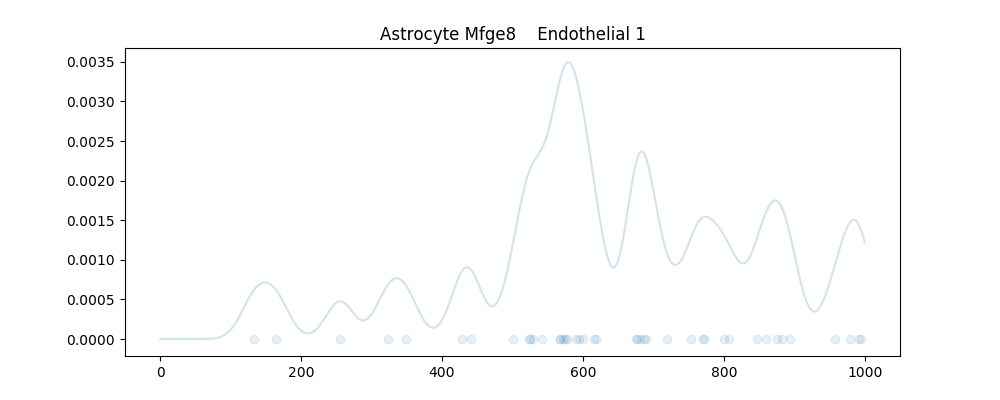

<IPython.core.display.Javascript object>


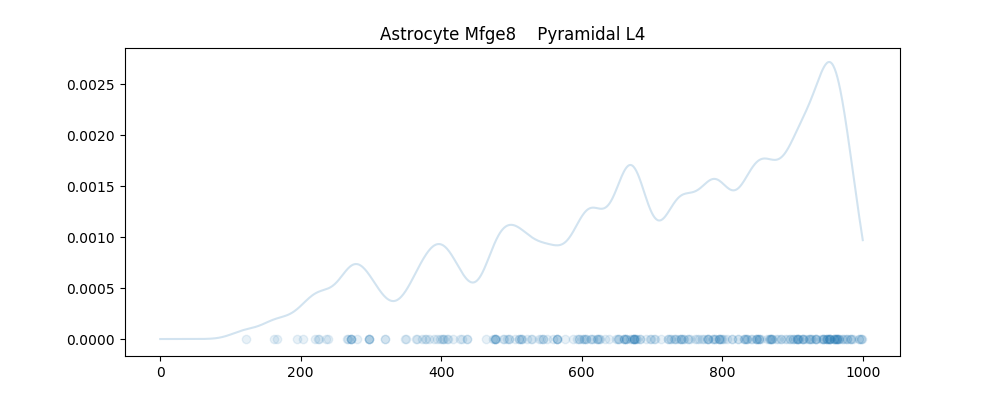

<IPython.core.display.Javascript object>


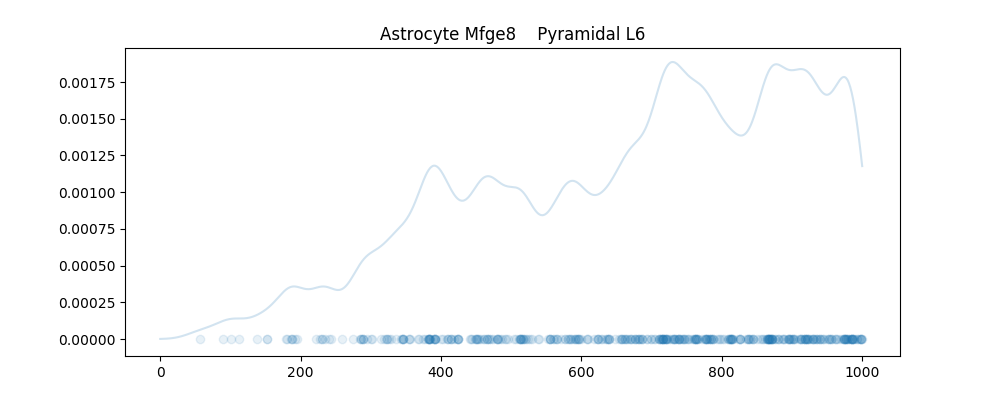

<IPython.core.display.Javascript object>


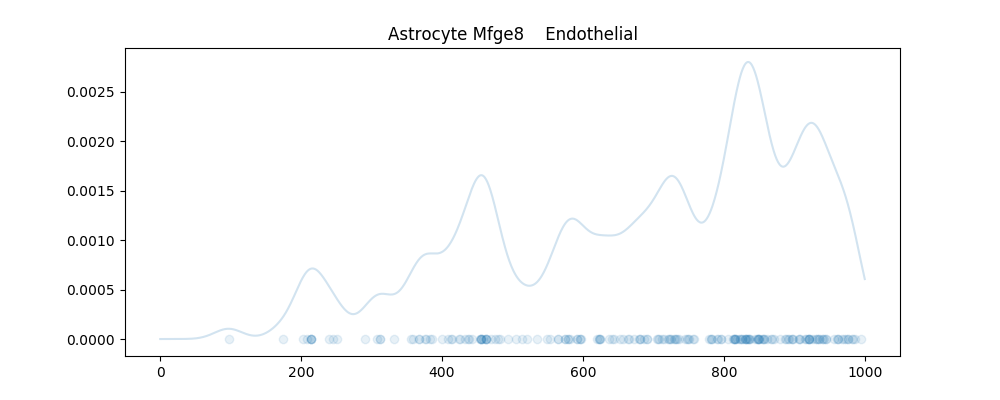

<IPython.core.display.Javascript object>


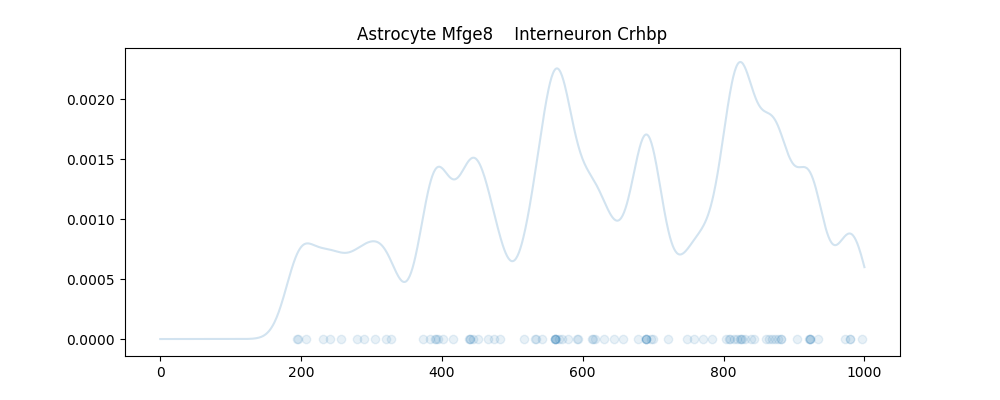

<IPython.core.display.Javascript object>


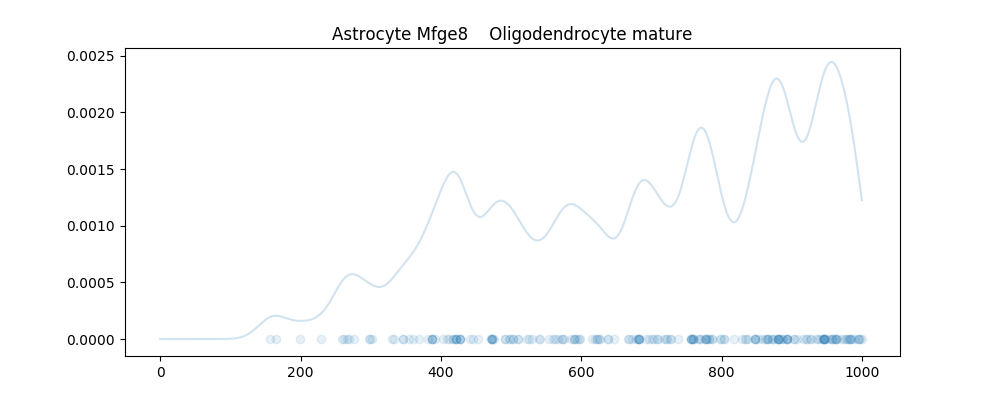

In [13]:
plt.ion()

for i in [i for i in combinations if 62 in i]: #combinations[:5]:
    cl_1 = i[0]
    cl_2 = i[1]
    
    dist_of_interest = df_dense_dm.loc[label_cells[cl_1], label_cells[cl_2]].values.ravel()
    dist_of_interest = dist_of_interest[dist_of_interest != 0]
    if dist_of_interest.size == 0:
        print('Not neighbours for combination {}'.format(i))
        pass

    else:
        plt.figure(figsize=(10,4))
        kde = KernelDensity(kernel='gaussian', bandwidth=20).fit(dist_of_interest.reshape(-1, 1))
        X_plot = np.linspace(0, 1000, 1000)[:, np.newaxis]
        log_dens = kde.score_samples(X_plot)
        log_dens = log_dens
        plt.plot(X_plot[:, 0], np.exp(log_dens), alpha = 0.2)
        
        plt.scatter(dist_of_interest, np.zeros(len(dist_of_interest)), alpha=0.1)

        #plt.ylim((-0.001, (0.00025 * len(dist_of_interest))))
        #plt.gca().set_axis_off()
        plt.title('{}    {}'.format(cluster_names[cl_1], cluster_names[cl_2]))
        #plt.savefig('micro_structure/{}_-_{}.png'.format(cluster_names[cl_1], cluster_names[cl_2]) ,transparent = False)

## Closest neighbour in um

In [452]:
#For each cell, find the closest neighbouring cell of all cell types
#Add the distances between these cells to a dictionary with distances 
#for each possible cluster combination (including itselve)

#Build the nearest neighbor tree
df_coord_um = df_coord * 0.065
tree_um = scipy.spatial.KDTree(df_coord_um)

#Make a dict to store all the cell type combinations as kyes and all the distances in a list.
combination_distance_dict = {}
for i in combinations:
    combination_distance_dict[i] = []
for i in np.unique(labels_a):
    combination_distance_dict[(i,i)] = []

counter = 0
#Loop over all cells and find the 1000 closest cells   
unique_labels = np.unique(labels_a)
for cell in df_fish_totmol_clean.columns:
    c_label = cell_labels[cell]
    dist = tree_um.query(df_coord_um.loc[cell], k = 1000)
    #Trim so that it does not find itselve
    trim_n = 1000 - len(np.trim_zeros(dist[0], trim='f'))
    nearest_labels = [labels_a[i] for i in dist[1][trim_n:]]
    distances = dist[0][trim_n:]
    
    #use the 100 closest cells to find the closest neighbour 
    for l in unique_labels:
        try:
            combination_distance_dict[(c_label, l)].append(distances[nearest_labels.index(l)])
        except Exception as e:
            counter += 1
            pass
print('Number of times the queried combination of a cell was not within the 1000 nearest neighbours: {}'.format(counter))

Number of times the queried combination of a cell was not within the 1000 nearest neighbours: 84619


In [511]:
#For each cell, find the closest neighbouring cell of all cell types
#Add the distances between these cells to a dictionary with distances 
#for each possible cluster combination (including itselve)

#Build the nearest neighbor tree
df_coord_um = df_coord * 0.065
tree_um = scipy.spatial.KDTree(df_coord_um)

#Make a dict to store all the cell type combinations as kyes and all the distances in a list.
combination_distance_dict_full = {}
for i in combinations:
    combination_distance_dict_full[i] = []
for i in np.unique(labels_a):
    combination_distance_dict_full[(i,i)] = []

counter = 0
counter1 = 0
counter2 = 0
#Loop over all cells and find the 1000 closest cells   
unique_labels = np.unique(labels_a)
for cell in df_fish_totmol_clean.columns:
    c_label = cell_labels[cell]
    dist = tree_um.query(df_coord_um.loc[cell], k = 1000)
    #Trim so that it does not find itselve
    trim_n = 1000 - len(np.trim_zeros(dist[0], trim='f'))
    nearest_labels = [labels_a[i] for i in dist[1][trim_n:]]
    distances = dist[0][trim_n:]
    
    #use the X closest cells to find the closest neighbour 
    for l in unique_labels:
        if (c_label,l) in combination_distance_dict.keys():
            try:
                combination_distance_dict_full[(c_label, l)].append(distances[nearest_labels.index(l)])
            except Exception as e:
                counter +=1
        elif (l,c_label) in combination_distance_dict.keys(): 
            try:
                combination_distance_dict_full[(l, c_label)].append(distances[nearest_labels.index(l)])
            except Exception as e:
                counter1 +=1
        else:
            counter2 += 1
            
        
print('Number of times the queried combination of a cell was not within the 4700 nearest neighbours: {}'.format(counter))
print(counter, counter1, counter2)

Number of times the queried combination of a cell was not within the 4700 nearest neighbours: 2271
2271 5632 0


In [12]:
# PERMUTATIONS

#For each cell, find the closest neighbouring cell of all cell types
#Add the distances between these cells to a dictionary with distances 
#for each possible cluster combination (including itselve)
#Not optimal code, 

#Build the nearest neighbor tree
df_coord_um = df_coord * 0.065
tree_um = scipy.spatial.KDTree(df_coord_um)

#Make a dict to store all the cell type permutations as keys and all the distances in a list.
permutations_distance_dict = {}
for i in permutations:
    permutations_distance_dict[i] = []
for i in np.unique(labels_a):
    permutations_distance_dict[(i,i)] = []

counter1 = 0
counter2 = 0
#Loop over all cells
unique_labels = np.unique(labels_a)
n_cells = df_fish_totmol_clean.shape[1]
for cell in df_fish_totmol_clean.columns:
    c_label = cell_labels[cell]
    #Distance of all cells
    dist = tree_um.query(df_coord_um.loc[cell], k = n_cells)
    #Trim so that it does not find the queried cell
    trim_n = n_cells - len(np.trim_zeros(dist[0], trim='f'))
    #Make list of the labels of the cells sorted by distance
    nearest_labels = [labels_a[i] for i in dist[1][trim_n:]]
    #List of distances sorted
    distances = dist[0][trim_n:]
    
    #use the closest cells to find the closest neighbour 
    for l in unique_labels:
        if (c_label,l) in permutations_distance_dict.keys():
            try:
                permutations_distance_dict[(c_label, l)].append(distances[nearest_labels.index(l)])
            except Exception as e:
                counter1 +=1
        else:
            counter2 += 1
            
        
print('Number of errors: Counter1={}, Counter2={}, Total={}'.format(counter1, counter2, (counter1 + counter2)))


Number of errors: Counter1=0, Counter2=0, Total=0


In [19]:
df_coord_um

,X,Y
1124,340.470527,2425.596051
2325,518.687016,1774.946791
2400,613.018336,1709.131334
241,361.707615,926.264694
6248,1313.731048,1202.077869
275,424.069339,902.217660
2573,548.025312,1866.097078
330,519.592443,901.303293
1149,387.364690,2451.371482
4813,1231.510683,701.932999


In [13]:
cluster_order =[68,69,66,93,78,85,47,73,
              54,21,45,55,90,13,87,91,79,
              63,62,43,17,61,41,94,83,75,81,27,37,92,89]

cluster_order = [18,17,14,19,15,16,20,
                9,8,10,6,5,4,12,1,13,
                3,2,
                32,33,30,22,21,
                28,29,24,27,31,7,26,25]

In [14]:
distance_matrix_permutations_mean = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
counter=0
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_permutations_mean.loc[r,c] = np.mean(permutations_distance_dict[r,c])
        except Exception as e:
            counter += 1
print('Mean: {} errors'.format(counter))            
            
distance_matrix_permutations_median = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
counter=0
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_permutations_median.loc[r,c] = np.median(permutations_distance_dict[r,c])
        except Exception as e:
            counter += 1
print('Median: {} errors'.format(counter))        


distance_matrix_permutations_std = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
counter=0
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_permutations_std.loc[r,c] = np.std(permutations_distance_dict[r,c])
        except Exception as e:
            counter += 1
print('Std: {} errors'.format(counter))  

Mean: 0 errors
Median: 0 errors
Std: 0 errors


## Plots

In [16]:
column_names = ['{}_{}'.format(i[0], i[1]) for i in combination_distance_dict.keys()]
df_fit_gaus = pd.DataFrame(data = np.zeros((5, len(combination_distance_dict.keys()))), 
                           index=['mean', 'weights', 'covariance', 'std', 'median'], 
                           columns = column_names)

clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
for i in list(combination_distance_dict.keys()):
    name = '{}_{}'.format(i[0], i[1])
    data = np.reshape(combination_distance_dict[i], (len(combination_distance_dict[i]),1))
    clf.fit(data)
    
    df_fit_gaus.loc['mean', name] = clf.means_
    df_fit_gaus.loc['weights', name] = clf.weights_
    df_fit_gaus.loc['covariance', name] = clf.covariances_
    df_fit_gaus.loc['std', name] = np.std(data)
    df_fit_gaus.loc['median', name] = np.median(data)
    
df_fit_gaus = df_fit_gaus.T

In [17]:
#plt.ion()
plt.ioff()

combinations_to_plot = list(df_fit_gaus.sort_values(by='mean', ascending=True).index)

for n, combi in enumerate(combinations_to_plot):
    plt.figure()
    combi = (int(combi.split('_')[0]), int(combi.split('_')[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    histdist = plt.hist(data, 50)

    clf = mixture.GaussianMixture(n_components=1, covariance_type='full')

    clf.fit(data)
    m = clf.means_
    w= clf.weights_
    c = clf.covariances_
    plotgauss1 = lambda x: plt.plot(x, w *matplotlib.mlab.normpdf(x,m,np.sqrt(c))[0], linewidth=3)
    plotgauss1(histdist[1].reshape(-1,1))
    
    plt.xlim(0, 500)
    plt.title('{}    {}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))
    plt.savefig('micro_structure/Sort_on_mean/{}_{}_{}.png'.format(n, cluster_names[combi[0]], cluster_names[combi[1]]))
    plt.close()
    

KeyboardInterrupt: 

In [ ]:
cluster_colors = {
    13: '#4facdc',
    17: '#5bc241',
    21: '#31609d',
    27: '#ffdf05',
    37: '#ccec19',
    41: '#508966',
    43: '#64c099',
    45: '#0e5d77',
    47: '#d5416a',
    54: '#62a8ba',
    55: '#396e87',
    61: '#66a44f',
    62: '#f69048',
    63: '#dc4501',
    66: '#983fd8',
    68: '#d0839e',
    69: '#592d95',
    73: '#a7506a',
    75: '#00c690',
    78: '#a16cda',
    79: '#06405e',
    81: '#026449',
    83: '#bc23b3',
    85: '#68396c',
    86: '#cf47ac',
    87: '#80a5da',
    88: '#6b6b6b',
    89: '#ef5454',
    90: '#41c6dd',
    91: '#538ee1',
    92: '#fb2828',
    93: '#bc89ca',
    94: '#2c5525'
}

In [ ]:
self_association = ['{}_{}'.format(i,i) for i in np.unique(labels_a)]
self_association_sort = df_fit_gaus.loc[self_association,'median'].sort_values().index

top = 10
x_limit = 300

nrows = len(self_association_sort[:top])
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(self_association_sort, axes):
    combi = (int(combi.split('_')[0]), int(combi.split('_')[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40, color = cluster_colors[combi[0]])
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    ax.set_title('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))

    
plt.xlim(0,x_limit)
plt.tight_layout()
#plt.savefig('Self_association.png', dpi= 300)

<IPython.core.display.Javascript object>


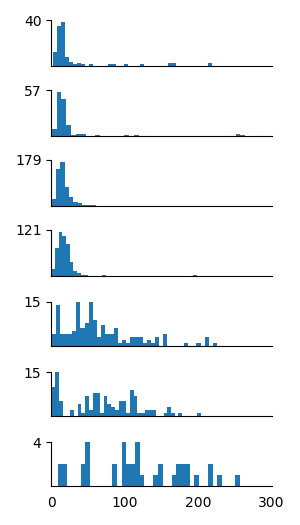

Ependymal
Hippocampal neuron
Pyramidal L4
Pyramidal L6
Astrocyte Mfge8
OPC
Microglia


In [82]:
combinations_self_association = [[27,27],
                                [79,79],
                                 [90,90],
                                 [91,91],
                                 [62,62],
                                 [43,43],
                                 [75,75,],
                                ]

x_limit = 300

nrows = len(combinations_self_association)
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(combinations_self_association, axes):
    combi = (int(combi[0]), int(combi[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40)#color = cluster_colors[combi[0]])
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    #ax.set_title('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))

    
plt.xlim(0,x_limit)
plt.tight_layout()
plt.savefig('Self_association.png', dpi= 300)

In [23]:
combinations_type_association_lamp5 = [[55,62],
                                 [13,62],
                                 [45,62]]

combinations_type_association_NO_lamp5 = [[62,90],
                                          [62,87],
                                         [62,91],
                                         
                                        ]

x_limit = 300

nrows = len(combinations_type_association_lamp5)
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(combinations_type_association_lamp5, axes):
    combi = (int(combi[0]), int(combi[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40)
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    #ax.set_title('{}_{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{} {}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))
    print(combi[0], combi[1])

    
plt.xlim(0,x_limit)
plt.tight_layout()
#plt.savefig('type_association_Lamp5.png', dpi= 300)

Pyramidal L2-3 L5 Astrocyte Mfge8
55 62
Pyramidal L4 2 Astrocyte Mfge8
13 62
Lamp5+ Astrocyte Mfge8
45 62


<IPython.core.display.Javascript object>


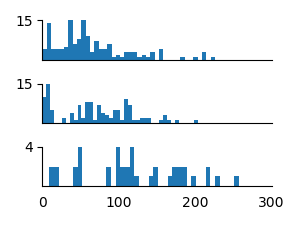

Astrocyte Mfge8 Astrocyte Mfge8
OPC OPC
Microglia Microglia


In [113]:
combinations_self_association_short = [[27,27],
                                 [79,79],
                                 [90,90]]

combinations_self_association_long = [[62,62],
                                          [43,43],
                                         [75,75]]                       
                                        

x_limit = 300

nrows = len(combinations_self_association_long)
figsize_x = 3
figsize_y = nrows * 0.75

fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize_x, figsize_y), sharex=True)

for combi, ax in zip(combinations_self_association_long, axes):
    combi = (int(combi[0]), int(combi[1]))
    data = np.reshape(combination_distance_dict[combi], (len(combination_distance_dict[combi]),1))
    data = data[data < x_limit]

    ax.hist(data, 40)
    
    #set the limits between zero and the end
    start, end = ax.get_ylim()
    ax.set_ylim(0, end)
    ax.spines['left'].set_bounds(0, int(end))
    ax.set_yticks([int(end)])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(bottom='off')
    #ax.set_title('{}_{}'.format(cluster_names[combi[0]], cluster_names[combi[1]]), size=8)
    print('{} {}'.format(cluster_names[combi[0]], cluster_names[combi[1]]))

    
plt.xlim(0,x_limit)
plt.tight_layout()
plt.savefig('self_association_long.png', dpi= 300)

## Heatmaps

In [567]:
#OLD stuff
distance_matrix_mean = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_mean.loc[r,c] = np.mean(combination_distance_dict[r,c])
        except Exception as e:
            distance_matrix_mean.loc[r,c] = np.mean(combination_distance_dict[c,r])

            
    ####### FULL            
distance_matrix_mean_full = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_mean_full.loc[r,c] = np.mean(combination_distance_dict_full[r,c])
        except Exception as e:
            distance_matrix_mean_full.loc[r,c] = np.mean(combination_distance_dict_full[c,r])
            
distance_matrix_median_full = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_median_full.loc[r,c] = np.median(combination_distance_dict_full[r,c])
        except Exception as e:
            distance_matrix_median_full.loc[r,c] = np.median(combination_distance_dict_full[c,r])            
            
            
            
            
            
distance_matrix_std = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_std.loc[r,c] = np.std(combination_distance_dict[r,c])
        except Exception as e:
            distance_matrix_std.loc[r,c] = np.std(combination_distance_dict[c,r])
            
distance_matrix_median = pd.DataFrame(data = np.zeros((len(cluster_order), len(cluster_order))), index=cluster_order, columns=cluster_order)
for r in cluster_order:
    for c in cluster_order:
        try:
            distance_matrix_median.loc[r,c] = stat.median(combination_distance_dict[r,c])
        except Exception as e:
            distance_matrix_median.loc[r,c] = stat.median(combination_distance_dict[c,r])

<IPython.core.display.Javascript object>


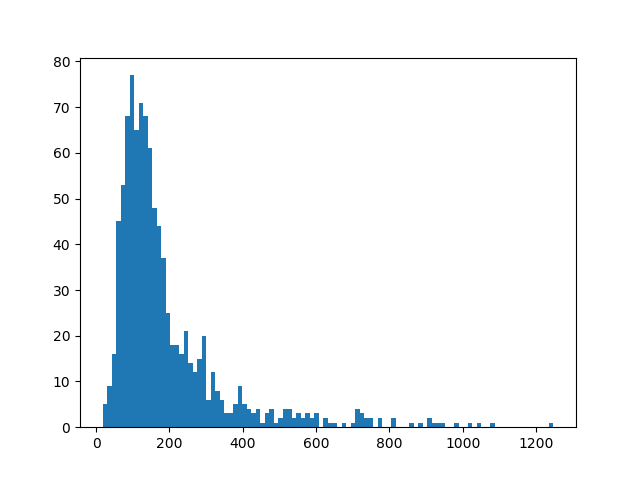

145.644393636


In [588]:
plt.figure()
plt.hist(distance_matrix_permutations_mean.values.flatten(), bins=100)
mean = np.mean(distance_matrix_mean.values.flatten())
std = np.std(distance_matrix_mean.values.flatten())
print(mean, )

<IPython.core.display.Javascript object>


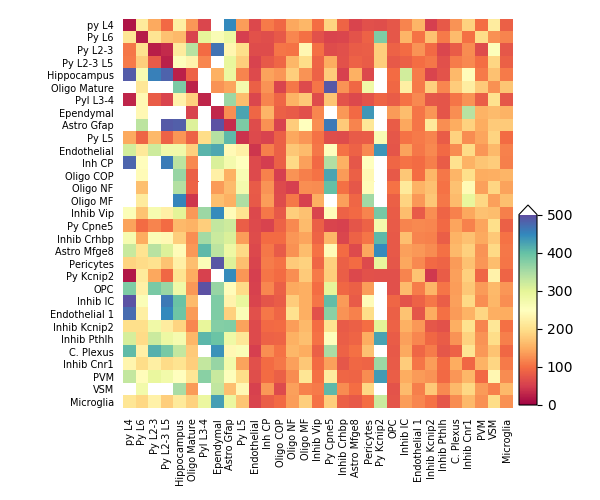

/home/lars/programs/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [17]:
sort_ripleyK = [75, 62, 92, 93, 81, 43, 83, 47, 66, 78, 89, 17, 45, 87, 37, 94, 55, 41, 73, 61, 13, 91, 63, 90, 85, 54, 69, 21, 68, 27, 79]

RK_750= [6993475.626978085,8529651.124303509,9209940.0220802,11024384.65574552,12359159.51319403,
13192238.114526842,13281187.658573063,13973921.95609501,14307407.01044843,15790531.810387362,
17048390.652906906,18670182.804481406,21075336.85752327,21664018.793600354,21772141.102856304,
22039085.08728149,24354653.40758514,25081398.38273463,31481047.279179625,32471422.52334025,
34955780.33119726,40162863.42000249,40346974.771027416,42036318.584969655,42512970.2587352,
46960666.93399165,51161664.32115443,52204376.8526718,57750314.84273426,69208201.55168189,
107598964.87520531]

# correct for Ripley K
#matrix_to_use = distance_matrix_mean.loc[sort_ripleyK, sort_ripleyK]
#matrix_to_use = matrix_to_use / RK_750

# Sort on Ripley K
#matrix_to_use = distance_matrix_median.loc[sort_ripleyK, sort_ripleyK]

# Sort on self association
matrix_to_use = distance_matrix_permutations_mean
self_dist = []
for i in matrix_to_use.index:
    self_dist.append(matrix_to_use.loc[i,i])
sort_self_association = [matrix_to_use.index[i] for i in np.argsort(self_dist)]

matrix_to_use = matrix_to_use.loc[sort_self_association, sort_self_association]

#matrix_to_use[matrix_to_use > 10] = np.nan

fig, ax = plt.subplots(figsize=(6,5))
im = ax.pcolormesh((matrix_to_use), cmap='Spectral', vmin=0, vmax=500) #np.nanmin(matrix_to_use)np.nanmax(matrix_to_use)RdYlBu #vmax=300
im.cmap.set_under('black', alpha=1) 
im.cmap.set_over('white', alpha=1) #'#e2e2e2'

cax = fig.add_axes([0.865, 0.19,  0.03, 0.4])
colorbar = fig.colorbar(im, cax=cax, extend='max',ticks=[0,100,200,300,400,500], )
colorbar.set_ticklabels(['0','100','200','300','400','500'])

ax.set_aspect('equal')

y_pos = np.arange(len(cluster_order))
x_pos = np.arange(len(cluster_order))
ax.set_xticks(x_pos+0.5)
ax.set_xticklabels([cluster_names_short[i] for i in matrix_to_use.columns], rotation='vertical', fontsize=7)
ax.set_yticks(y_pos+0.5)
ax.set_yticklabels([cluster_names_short[i] for i in matrix_to_use.columns], fontsize=7);
ax.invert_yaxis()

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.tight_layout()

#plt.savefig('Mean_distance_matrix_purple.png')
plt.savefig('Mean_distance_matrix_180220.pdf')

#Mean distance to the closest cell of every type

In [596]:
#Mean of the mean distance of the endothelial(92) to all other types

dist_endo = distance_matrix_permutations_mean.loc[distance_matrix_permutations_mean.columns != 92, 92]

print('Endothelial cells are on average {} um away from all other cell types, with an std of {}'.format(np.mean(dist_endo), np.std(dist_endo)))

Endothelial cells are on average 60.88255238815049 um away from all other cell types, with an std of 6.1852491949927355


In [18]:
for i in sort_self_association:
    print(cluster_names_short[i])

py L4
Py L6
Py L2-3
Py L2-3 L5
Hippocampus
Oligo Mature
Pyl L3-4
Ependymal
Astro Gfap
Py L5
Endothelial
Inh CP
Oligo COP
Oligo NF
Oligo MF
Inhib Vip
Py Cpne5
Inhib Crhbp
Astro Mfge8
Pericytes
Py Kcnip2
OPC
Inhib IC
Endothelial 1
Inhib Kcnip2
Inhib Pthlh
C. Plexus
Inhib Cnr1
PVM
VSM
Microglia


In [267]:
import scipy.cluster.hierarchy as hierarchy

a = hierarchy.linkage(distance_matrix_median, method='complete', metric='correlation')
hierarchy.fcluster(a,0)

array([15,  6,  6,  9, 17, 14, 11,  7, 10, 15, 18, 16, 13, 11, 14,  1,  9,
        8, 19, 19,  3,  5,  3,  1, 20, 12, 20,  4, 18, 21,  2], dtype=int32)

# Permutation test

In [18]:
# Permutation Test

combination_rand = {}
for i in combinations:
    combination_rand[i] = []
for i in np.unique(labels_a):
    combination_rand[(i,i)] = []

cell_neigbours = {}
    
unique_labels = np.unique(labels_a)
for cell in df_fish_totmol_clean.columns:
    c_label = cell_labels[cell]
    dist = tree_um.query(df_coord_um.loc[cell], k = 1000)
    trim_n = 1000 - len(np.trim_zeros(dist[0], trim='f'))
    cell_neigbours[cell] = [ list(dist[0][trim_n:]), list(dist[1][trim_n:])]
    #cell_neigbours[cell] = [distances, neighbour_cell_id]

In [20]:
# Permutation Test

iterations = 1000

randomisation_results = {}
for k in combination_rand.keys():
    randomisation_results[k] = [[] for i in range(iterations)]

labels_a_random = labels_a.copy()
for it in range(iterations):
    np.random.shuffle(labels_a_random)
    
    for n, cell in enumerate(df_fish_totmol_clean.columns):
        c_label = labels_a_random[n]
        nearest_labels = [labels_a_random[i] for i in cell_neigbours[cell][1]]
        
        for l in unique_labels:
            try:
                randomisation_results[(c_label, l)][it].append(cell_neigbours[cell][0][nearest_labels.index(l)])
            except Exception as e:
                pass

#1000 iteration took 14 minutes

In [371]:
#number of times the found value is below the mean of the randomized data
p_combination_distance = {}
for k in combination_distance_dict.keys():
    mean_real = np.mean(combination_distance_dict[k])
    #p_combination_distance[k] = (sum([i<mean_real for i in [np.mean(i) for i in randomisation_results[k]]]) / iterations) * 100
    
    median_rand = np.median([np.mean(i) for i in randomisation_results[k]])
    p_combination_distance[k] = 1 - (sum(np.abs(mean_real - median_rand) > r for r in [np.abs(np.mean(i) - median_rand) for i in randomisation_results[k]]) / iterations)

In [374]:
for k in p_combination_distance:
    if p_combination_distance[k] < 0.0001:
        print(k, p_combination_distance[k], cluster_names[k[0]], cluster_names[k[1]])

(13, 17) 0.0 Pyramidal L4 2 Oligodendrocyte COP
(13, 27) 0.0 Pyramidal L4 2 Ependymal
(13, 41) 0.0 Pyramidal L4 2 Oligodendrocytes MF
(13, 45) 0.0 Pyramidal L4 2 Lamp5+
(13, 54) 0.0 Pyramidal L4 2 Pyramidal L2-3
(13, 55) 0.0 Pyramidal L4 2 Pyramidal L2-3 L5
(13, 61) 0.0 Pyramidal L4 2 Oligodendrocyte NF
(13, 63) 0.0 Pyramidal L4 2 Astrocyte Gfap
(13, 66) 0.0 Pyramidal L4 2 Interneuron Kcnip2
(13, 68) 0.0 Pyramidal L4 2 Interneuron Kcnip2, Syt6
(13, 69) 0.0 Pyramidal L4 2 Interneuron Gad2 Slc32a1-
(13, 78) 0.0 Pyramidal L4 2 Interneuron Cnr1
(13, 79) 0.0 Pyramidal L4 2 Hippocampal neuron
(13, 87) 0.0 Pyramidal L4 2 Pyramidal L5
(13, 89) 0.0 Pyramidal L4 2 Endothelial 1
(13, 90) 0.0 Pyramidal L4 2 Pyramidal L4
(13, 91) 0.0 Pyramidal L4 2 Pyramidal L6
(13, 93) 0.0 Pyramidal L4 2 Interneuron Crhbp
(13, 94) 0.0 Pyramidal L4 2 Oligodendrocyte mature
(17, 21) 0.0 Oligodendrocyte COP Pyramidal interface L3-4
(17, 27) 0.0 Oligodendrocyte COP Ependymal
(17, 37) 0.0 Oligodendrocyte COP Pericytes


<IPython.core.display.Javascript object>


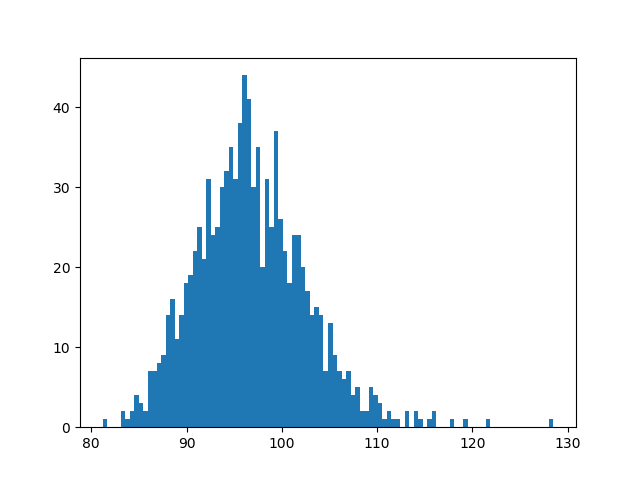

88.2748279439
Lamp5+ Interneuron Cnr1


In [136]:
plt.figure()
combo = (45, 78)
plt.hist([np.mean(i) for i in randomisation_results[combo]], bins=100)

print(np.mean(combination_distance_dict[combo]))
print(cluster_names[combo[0]], cluster_names[combo[1]])